In [1]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

import resspect.cosmo_metric_utils as cmu

In [19]:
# DDF summary on the COIN server:

file_extension =  'ddf'

dist_loc_base = '/media/RESSPECT/data/PLAsTiCC/for_metrics/' + file_extension + '/distances/omprior_0.01_flat/emille_samples/*' #mu_photoIa_plasticc*'

if 'wfd' in file_extension:
    table_loc = '/media2/RESSPECT2/data/posteriors_wfd/omprior_0.01_flat/summary_cases_omprior_0.01_flat_emille.csv'
else:
    table_loc1 = '/media2/RESSPECT2/data/posteriors_ddf/omprior_0.01_flat/summary_cases_emille.csv' 
    table_loc2 = '/media2/RESSPECT2/data/posteriors_ddf/omprior_0.01_flat/summary_cases_redone.csv' 

dist_loc_files = glob.glob(dist_loc_base)

In [20]:
df1 = pd.read_csv(table_loc1)
df2 = pd.read_csv(table_loc2)

In [21]:
for i in range(df1.shape[0]):
    
    case = df1.iloc[i]['case']
    
    for j in range(df2.shape[0]):
        if case == df2.iloc[j]['case']:
            df1.at[i, 'KLD'] = df2.iloc[j]['KLD']
            
df = df1

In [22]:
from collections import OrderedDict
if 'wfd' in file_extension:
    remap_dict = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              'random3000fail2998': 'Random',
                              'random3000': 'Random',
                              'all_objs_survived_SALT2_DDF' : 'All SALT',
                              'all_objs_survived_SALT2_WFD': 'All SALT',
                              '50SNIa50SNII': 'SN-II 50',
                              '68SNIa32SNII': 'SN-II 32',
                              '72SNIa28SNII': 'SN-II 28',
                              '75SNIa25SNII': 'SN-II 25', 
                              '90SNIa10SNII': 'SN-II 10',
                              '95SNIa5SNII': 'SN-II 5',
                              '98SNIa2SNII': 'SN-II 2',
                              '99SNIa1SNII': 'SN-II 1',
                              '50SNIa50SNIbc': 'SN-Ibc 50',
                              '68SNIa32SNIbc': 'SN-Ibc 32',
                              '75SNIa25SNIbc': 'SN-Ibc 25',
                              '83SNIa17SNIbc': 'SN-Ibc 17',
                              '90SNIa10SNIbc': 'SN-Ibc 10',
                              '95SNIa5SNIbc': 'SN-Ibc 5',
                              '98SNIa2SNIbc': 'SN-Ibc 2',
                              '99SNIa1SNIbc': 'SN-Ibc 1',
                              '50SNIa50SNIax': 'SN-Iax 50',
                              '68SNIa32SNIax': 'SN-Iax 32',
                              '75SNIa25SNIax': 'SN-Iax 25',
                              '86SNIa14SNIax': 'SN-Iax 14',
                              '90SNIa10SNIax': 'SN-Iax 10',
                              '94SNIa6SNIax': 'SN-Iax 6',
                              '95SNIa5SNIax': 'SN-Iax 5',
                              '97SNIa3SNIax': 'SN-Iax 3',
                              '98SNIa2SNIax': 'SN-Iax 2',
                              '99SNIa1SNIax': 'SN-Iax 1',
                              '71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                              '75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                              '90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                              '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                              '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                              '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                              '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                              '57SNIa43AGN': 'AGN 43',
                              '75SNIa25AGN': 'AGN 25',
                              '90SNIa10AGN': 'AGN 10',
                              '94SNIa6AGN': 'AGN 6',
                              '95SNIa5AGN': 'AGN 5',
                              '98SNIa2AGN': 'AGN 2',
                              '99SNIa1AGN': 'AGN 1',
                              '99.9SNIa0.1AGN': 'AGN 0.1',
                              '83SNIa17SLSN-I': 'SNLS-I 17',
                              '90SNIa10SLSN-I': 'SNLS-I 10',
                              '95SNIa5SLSN-I': 'SNLS-I 5',
                              '98SNIa2SLSN-I': 'SNLS-I 2',
                              '99SNIa1SLSN-I': 'SNLS-I 1',
                              '99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                              '95SNIa5TDE': 'TDE 5',
                              '98SNIa2TDE': 'TDE 2',
                              '99SNIa1TDE': 'TDE 1',
                              '99.6SNIa0.4TDE': 'TDE 0.4',
                              '99.1SNIa0.9CART': 'CART 0.9',
                              '99.7SNIa0.3CART': 'CART 0.3'
                  })
else:
    remap_dict = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000fail2998': 'Random',
                          'random3000': 'Random',
                          'all_objs_survived_SALT2_DDF' : 'All SALT',
                          'all_objs_survived_SALT2_WFD': 'All SALT',
                          '50SNIa50SNII': 'SN-II 50',
                          '68SNIa32SNII': 'SN-II 32',
                          '72SNIa28SNII': 'SN-II 28',
                          '75SNIa25SNII': 'SN-II 25', 
                          '90SNIa10SNII': 'SN-II 10',
                          '95SNIa5SNII': 'SN-II 5',
                          '98SNIa2SNII': 'SN-II 2',
                          '99SNIa1SNII': 'SN-II 1',
                          '50SNIa50SNIbc': 'SN-Ibc 50',
                          '68SNIa32SNIbc': 'SN-Ibc 32',
                          '75SNIa25SNIbc': 'SN-Ibc 25',
                          '83SNIa17SNIbc': 'SN-Ibc 17',
                          '90SNIa10SNIbc': 'SN-Ibc 10',
                          '95SNIa5SNIbc': 'SN-Ibc 5',
                          '98SNIa2SNIbc': 'SN-Ibc 2',
                          '99SNIa1SNIbc': 'SN-Ibc 1',
                          '50SNIa50SNIax': 'SN-Iax 50',
                          '68SNIa32SNIax': 'SN-Iax 32',
                          '75SNIa25SNIax': 'SN-Iax 25',
                          '86SNIa14SNIax': 'SN-Iax 14',
                          '90SNIa10SNIax': 'SN-Iax 10',
                          '94SNIa6SNIax': 'SN-Iax 6',
                          '95SNIa5SNIax': 'SN-Iax 5',
                          '97SNIa3SNIax': 'SN-Iax 3',
                          '98SNIa2SNIax': 'SN-Iax 2',
                          '99SNIa1SNIax': 'SN-Iax 1',
                          '99.1SNIa0.9CART': 'CART 0.9',
                          '99.7SNIa0.3CART': 'CART 0.3',
                          '71SNIa29SNIa-91bg': 'SN-Ia-91bg 29',
                          '75SNIa25SNIa-91bg': 'SN-Ia-91bg 25',
                          '90SNIa10SNIa-91bg': 'SN-Ia-91bg 10',
                          '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                          '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                          '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                          '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                          '57SNIa43AGN': 'AGN 43',
                          '75SNIa25AGN': 'AGN 25',
                          '90SNIa10AGN': 'AGN 10',
                          '94SNIa6AGN': 'AGN 6',
                          '95SNIa5AGN': 'AGN 5',
                          '98SNIa2AGN': 'AGN 2',
                          '99SNIa1AGN': 'AGN 1',
                          '99.9SNIa0.1AGN': 'AGN 0.1',
                          '83SNIa17SLSN-I': 'SNLS-I 17',
                          '90SNIa10SLSN-I': 'SNLS-I 10',
                          '95SNIa5SLSN-I': 'SNLS-I 5',
                          '98SNIa2SLSN-I': 'SNLS-I 2',
                          '99SNIa1SLSN-I': 'SNLS-I 1',
                          '99.9SNIa0.1SLSN': 'SNLS-I 0.1',
                          '95SNIa5TDE': 'TDE 5',
                          '98SNIa2TDE': 'TDE 2',
                          '99SNIa1TDE': 'TDE 1',
                          '99.6SNIa0.4TDE': 'TDE 0.4',
              })

In [23]:
all_shapes = {'SNIa-91bg': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'SLSN-I': 'v',
              'AGN': '^',
              'TDE': '<',
              'KN': '>',
              'CART': 'v'}

In [24]:
# Mapping the percent contaminated to the colormap.
## size corresponds to remap_dict
if 'wfd' in file_extension:
    color_nums = np.array([1, 1, 1, 1, 1, 1,                    # Special
                           50, 32, 28, 25, 10, 5, 2, 1,   # II
                           50, 32, 25, 17, 10, 5, 2, 1,               # Ibc
                           50, 32, 25, 14, 10, 6, 5, 3, 2, 1,         # Iax
                           29, 25, 10, 5, 2, 1, 1,                          # 91bg
                           43, 25, 10, 6, 5, 2, 1, 1,                      # AGN
                           17, 10, 5, 2, 1, 1,                            # SNLS
                           5, 2, 1, 1,                            # TDE
                           1, 1,                           # CART
                          ]) #+ 1                    
else:
        color_nums = np.array([1, 1, 1, 1, 1, 1,                    # Special
                           50, 32, 28, 25, 10, 5, 2, 1,   # II
                           50, 32, 25, 17, 10, 5, 2, 1,               # Ibc
                           50, 32, 25, 14, 10, 6, 5, 3, 2, 1,         # Iax
                           1, 1,                           # CART
                           29, 25, 10, 5, 2, 1, 1,                          # 91bg
                           43, 25, 10, 6, 5, 2, 1, 1,                      # AGN
                           17, 10, 5, 2, 1, 1,                            # SNLS
                           5, 2, 1, 1,                            # TDE
                          ]) #+ 1   

In [25]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

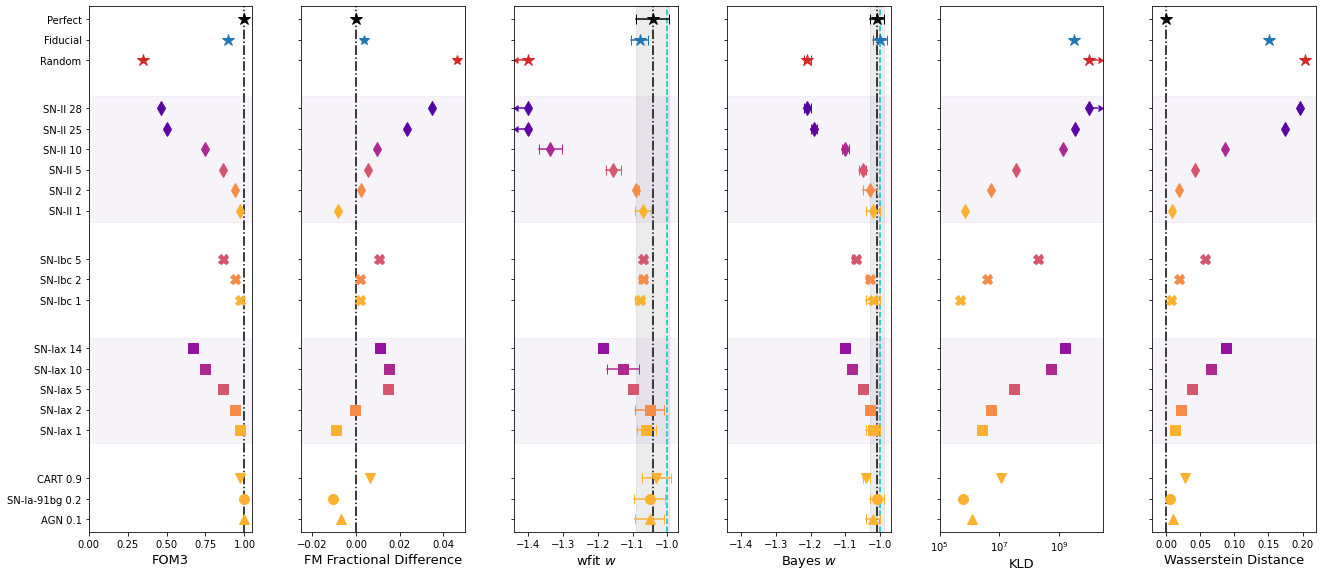

In [31]:
fig, axes = plt.subplots(1, 6, figsize=(22,10), sharey=True)

# wfit
ax1 = axes[2]
# Bayes
ax2 = axes[3]

ax1.axvline(-1, color='c', ls='--')
ax2.axvline(-1, color='c', ls='--')

ax1.axvline(df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')
ax1.axvspan(df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values-df['wfit_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            df['wfit_w_lowz'].loc[df['case'] == 'perfect3000'].values+df['wfit_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            alpha=0.15, color='grey')

ax2.axvline(df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')
ax2.axvspan(df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values-df['stan_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            df['stan_w_lowz'].loc[df['case'] == 'perfect3000'].values+df['stan_wsig_lowz'].loc[df['case'] == 'perfect3000'].values, 
            alpha=0.15, color='grey')

# Fisher
# percent different
ax3 = axes[1]
ax3.axvline(0, color='k', ls='-.')
df_fisher = pd.read_csv('/media/RESSPECT/data/PLAsTiCC/for_metrics/'+file_extension+'/distances/omprior_0.01_flat/emille_samples/stan_input_salt2mu_lowz_withbias_perfect3000.csv')
sig_perf = cmu.fisher_results(df_fisher['z'].values, df_fisher['muerr'].values)[0]


# Wasserstein
ax4 = axes[5]
ax4.axvline(0, color='k', ls='-.')

# FOM3
ax5 = axes[0]
ax5.axvline(df['fom3'].loc[df['case'] == 'perfect3000'].values, color='k', ls='-.')

# KLD
ax6 = axes[4]

i = 0
tick_lbls = []
i_list = []
for j, (a, c) in enumerate(zip(remap_dict, color_nums)):
    try:
        # wfit
        wfw = df['wfit_w_lowz'].loc[df['case'] == a].values
        wfw_sig = df['wfit_wsig_lowz'].loc[df['case'] == a].values
        class_ = str.split(remap_dict[a])[0]
        
        # Fisher
        file = glob.glob(dist_loc_base + a + '.csv')
        df_ = pd.read_csv(str(file[0]))
        sig = cmu.fisher_results(df_['z'].values, df_['muerr'].values)[0]
        
        # Wasserstein
        wsd = df['WassersteinDistanceMedian'].loc[df['case'] == a].values
        
        # fom3
        fom3 = df['fom3'].loc[df['case'] == a].values
        
        # KLD
        kld = df['KLD'].loc[df['case'] == a].values

        if '91bg' in class_:
            class_ = 'SNIa-91bg'
        else:
            class_ = class_.replace('-', '')

        bad_data=False
        if wfw[0] < -2.2:
            wfw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]
        
        if 'ddf' in file_extension:
            if 'fiducial' in a:
                mfc = 'tab:blue'
            elif 'random' in a:
                mfc = 'tab:red'
            elif 'perfect' in a:
                mfc = 'k'
            else:
                mfc = color_map[c]
        if 'wfd' in file_extension:
            mfc = "none"

        if 'fiducial' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
        elif 'random' in a:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax1.plot(wfw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='tab:red', ms=10)
        elif 'perfect' in a:
            ax1.plot(wfw, -i, '*', color='k', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='k', ms=10 )
        elif 'all_objs_survived' in a:
            ax1.plot(wfw, -i, '*', color='seagreen', ms=12, mfc=mfc)
            ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color='seagreen', ms=10 )
        else:
            if bad_data:
                ax1.errorbar(wfw, [-i], xerr=[0.03], marker=all_shapes[class_],color=color_map[c],
                             xuplims=xuplims, markersize=10)
            else:
                ax1.plot(wfw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
                ax1.plot([wfw - wfw_sig, wfw + wfw_sig], [-i, -i], "|-", color=color_map[c], ms=10)

        # Stan/Bayes
        bw = df['stan_w_lowz'].loc[df['case'] == a].values
        bw_sig = df['stan_wsig_lowz'].loc[df['case'] == a].values
        
        bad_data=False
        if bw[0] < -2.2:
            bw[0] = -1.4
            bad_data=True
            xuplims=[-1.5]

        if 'fiducial' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:blue',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:blue', ms=10)
                ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, color='tab:blue', marker='*', ms=10, mfc=mfc)
                ax4.plot(wsd, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax5.plot(fom3, -i, '*', color='tab:blue', ms=12, mfc=mfc)
                ax6.semilogx(kld, -i, '*', color='tab:blue', ms=12, mfc=mfc)
        elif 'random' in a:
            if bad_data:
                ax2.errorbar(bw, [-i], xerr=[0.03], marker='*',color='tab:red',
                             xuplims=xuplims, markersize=12, mfc=mfc)
            else:
                ax2.plot(bw, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='tab:red', ms=10)
                ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, 'o', color='tab:red', marker='*', ms=10, mfc=mfc)
                ax4.plot(wsd, -i, '*', color='tab:red', ms=12, mfc=mfc)
                ax5.plot(fom3, -i, '*', color='tab:red', ms=12, mfc=mfc)
                if np.isnan(kld):
                    # xlolims=[4e10]
                    ax6.errorbar(1e10, [-i], xerr=[1e10], marker='*',color='tab:red',
                                 xlolims=True, 
                                 markersize=12, mfc=mfc)
                else:
                    ax6.semilogx(kld, -i, '*', color='tab:red', ms=12, mfc=mfc)
        elif 'perfect' in a:
            ax2.plot(bw, -i, '*', color='k', ms=12, mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color='k', ms=10 )
            ax3.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
            ax4.plot(0, -i, '*', color='k', ms=12, mfc=mfc)
            ax5.plot(fom3, -i, '*', color='k', ms=12, mfc=mfc)
        else:
            ax2.plot(bw, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax2.plot([bw - bw_sig, bw + bw_sig], [-i, -i], "|-", color=color_map[c], ms=10)
            ax3.plot((sig[1]-sig_perf[1])/sig_perf[1], -i, color=color_map[c], marker=all_shapes[class_], ms=10, mfc=mfc)
            ax4.plot(wsd, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            ax5.plot(fom3, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            if np.isnan(kld):
                ax6.errorbar(1e10, [-i], xerr=[1e10],  marker=all_shapes[class_], color=color_map[c],
                                 xlolims=True, 
                                 markersize=10, mfc=mfc)
            else:
                ax6.semilogx(kld, -i, color=color_map[c], ms=10, marker=all_shapes[class_], mfc=mfc)
            
        tick_lbls.append(remap_dict[a])
        i_list.append(-i)
        i +=0.8
        if 'random' in a or '99SNIa1' in a:
            i_list.append(-i)
            i += 1.1
            tick_lbls.append('')
    except:
        continue
        #print("Missing: ", a)

tick_locs = i_list[::-1]
#np.arange(-len(tick_lbls)+1, 1)
ax1.set_yticks(tick_locs)
ax1.set_yticklabels(tick_lbls[::-1], fontsize=13)

ax1.set_ylim(i_list[-1]-0.5, i_list[0]+0.5)#-len(tick_lbls)+0.5, 0.5)


ax1.set_xlabel(r'wfit $w$', fontsize=13)
ax2.set_xlabel(r'Bayes $w$', fontsize=13)
ax3.set_xlabel('FM Fractional Difference', fontsize=13)
ax4.set_xlabel('Wasserstein Distance', fontsize=13)
ax5.set_xlabel('FOM3', fontsize=13)
ax6.set_xlabel('KLD', fontsize=13)
plt.subplots_adjust(bottom=0.15, wspace=0.3) # wspace=0.05

        
if 'ddf' in file_extension:
    ax1.set_xlim(-1.44, -0.97)
    ax2.set_xlim(-1.44, -0.97)
    ax3.set_xlim(-0.025, 0.05)
    ax4.set_xlim(-0.02, 0.22)
    ax5.set_xlim(0, 1.05)
    ax6.set_xlim(1e5, 3e10)
if 'wfd' in file_extension:
    ax1.set_xlim(-1.34, -0.77)
    ax2.set_xlim(-1.2, -0.97)
    ax3.set_xlim(-0.01, 0.03)
    ax4.set_xlim(-0.02, 0.12)
    ax5.set_xlim(-0.02, 1.05)
    ax6.set_xlim(1e4, 1e9)

if 'ddf' in file_extension:
    #ticks = [-4, -13, -19, -24, -27, -30]
    ticks = [-4, -11, -15, -21]

    #ax1.axvspan(-2.3, -0.9, ymin=0.6, ymax=0.88, alpha=0.08, color='tab:green')
    #ax1.axvspan(-2.3, -0.9, ymin=0.22, ymax=0.37, alpha=0.08, color='tab:green')
    #ax1.axvspan(-2.3, -0.9, ymin=0., ymax=0.1, alpha=0.08, color='tab:green')
   
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-2.3, 5e10, ymin=0.59, ymax=0.83, alpha=0.08, color='tab:purple')
        ax.axvspan(-2.3, 5e10, ymin=0.17, ymax=0.37, alpha=0.08, color='tab:purple')
    
    #ax1.axvspan(-2.3, -0.9, ymin=0., ymax=0.1, alpha=0.08, color='tab:green')
    #ax2.axvspan(-2.3, -0.9, ymin=0., ymax=0.1, alpha=0.08, color='tab:green')
    
if 'wfd' in file_extension:
    #ticks = [-8, -13, -19, -23, -27]
    #ticks = [-3, -10, -15, -21, -25, -29]
    ticks = [-3, -9, -14, -20, -24, -28]

    #ax1.axvspan(-1.5, -0.7, ymin=0.59, ymax=0.73, alpha=0.08, color='tab:green')
    #ax1.axvspan(-1.5, -0.7, ymin=0.25, ymax=0.35, alpha=0.08, color='tab:green')
    #ax1.axvspan(-1.5, -0.7, ymin=0., ymax=0.07, alpha=0.08, color='tab:green')
    
    for ax in axes:
        for t in ticks:
            yticks = ax.yaxis.get_major_ticks()
            yticks[t].set_visible(False)
        ax.axvspan(-1.5, 2e10, ymin=0.725, ymax=0.9, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.35, ymax=0.55, alpha=0.08, color='tab:purple')
        ax.axvspan(-1.5, 2e10, ymin=0.09, ymax=0.21, alpha=0.08, color='tab:purple')
    
plt.savefig('all_metrics_' + file_extension + '_lowz_20210803_emillesamp.pdf', bbox_inches='tight')


